In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [2]:
# Please select dataset present in a CSV or Excel file

from tkfilebrowser import askopenfilename
while True:

    try:
    
        filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
        name,ext = filename.split('.')
        try:
            if ext == 'csv':
                df = pd.read_csv(f"{filename}")
                      
            elif ext == 'xlsx':
                df = pd.read_excel(f"{filename}")
                
                            
            else:
                print("Please select a csv or excel file")
                continue
                
        except:
            print("There is some error with the file data or format. Please select correct file")
            continue
        else:
            break
    except:
        print("There is some error with the file data or format. Please select correct file")
        continue
        

In [3]:
#Size of the data sets,
#Field Types,
#N-rows & N-columns
#Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
#Remove Repeated Rows
df['is_duplicated'] = df.duplicated(df.columns)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,is_duplicated
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",False
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",False
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",False
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,False
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,False


In [6]:
duplicate = 0
for i in list(df.index):
    if df['is_duplicated'][i] == True:
        print(f'Duplicate row with index location {i} has been deleted')
        df.drop(i,axis=0,inplace=True)
        duplicate+=1
if duplicate==0:
    print('No duplicate rows found')

No duplicate rows found


In [7]:
#Remove Redundant columns
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
            col = df.iloc[:, x]
            for y in range(x + 1, df.shape[1]):
                otherCol = df.iloc[:, y]
                if col.equals(otherCol):
                    duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = getDuplicateColumns(df)
print('Below duplicate Columns have been dropped - ')
for col in duplicateColumnNames:
    print('Column name : ', col)
    df.drop(col,axis=1,inplace= True)

Below duplicate Columns have been dropped - 


In [8]:
#Exclude any columns that are of type object/bool as generakky they are not required ones (intuition).
#If they are required columns, they would need to be treated separately
df = df.select_dtypes(exclude=['object','bool'])
df.index = list(range(len(df.index)))
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
#dataframe info after above processing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 273.4 KB


In [10]:
# Determine if any of the values are Null
#If found, would need to be treated separatly. Either update missing values with mean/median/mode/relevant data or drop the rows with Null values
df.isnull().values.any()

False

In [11]:
# Determine if any of the values are Non a number (NAN)
#If found, would need to be treated separatly. Either update missing values with mean/median/mode/relevant data or drop the rows with NAN values
df.isna().values.any()

False

skewness:
 Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64
**************************************************
kurtosis:
 Avg. Area Income                0.045574
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.074652
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.006733
Price                          -0.054918
dtype: float64


C:\Users\Naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



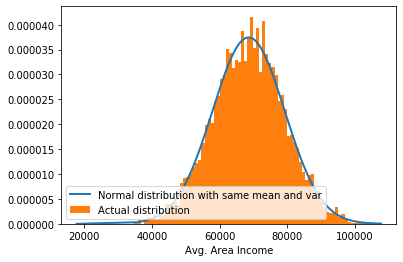

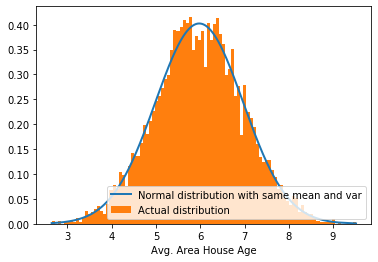

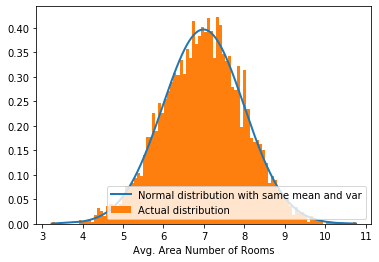

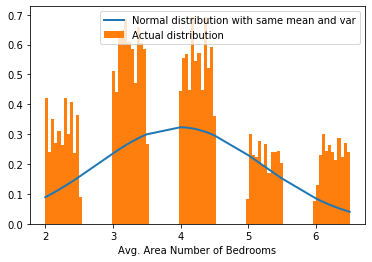

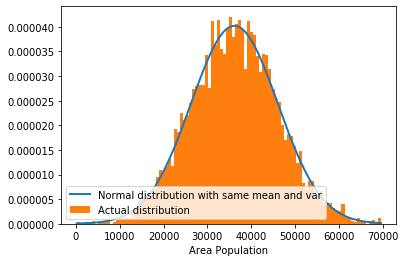

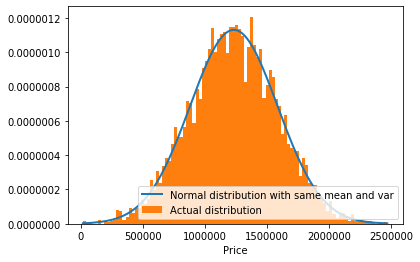

In [12]:
#skewness
print("skewness:\n",df.skew())

print("*"*50)
#kurtosis
print("kurtosis:\n",df.kurt())

#convert pandas DataFrame object to numpy array and sort
for col in df:
    h = np.asarray(df[col])
    h = sorted(h)
    #use the scipy stats module to fit a normal distribution with same mean and standard deviation
    fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
    #plot both series on the histogram
    plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var");
    plt.hist(h,normed=True,bins = 100,label="Actual distribution");     
    plt.xlabel(df.columns[df.columns.get_loc(col)])
    plt.legend();
    plt.show();

In [13]:
#Summary stats for columns/fields
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Mean:  68583.10898395971 
Median:  68804.28640371616 
Mode:  17796.631189543397


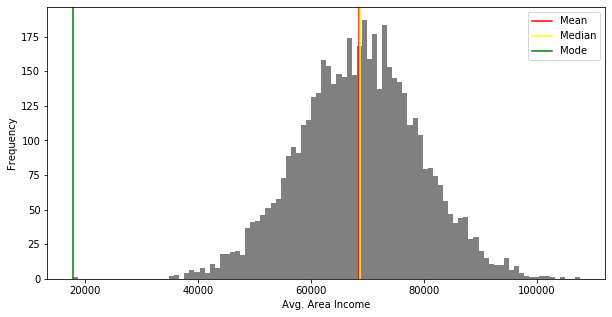

Mean:  5.977222035280289 
Median:  5.970428947124802 
Mode:  2.644304186036705


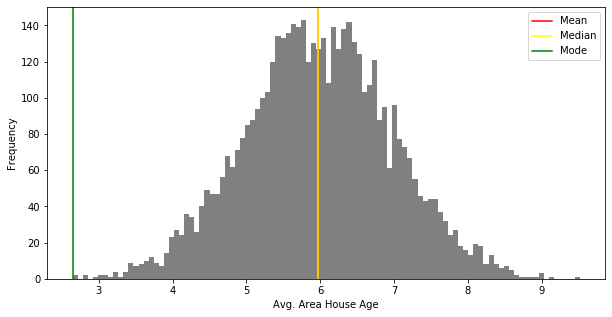

Mean:  6.987791850907942 
Median:  7.002901987201934 
Mode:  3.2361940234262048


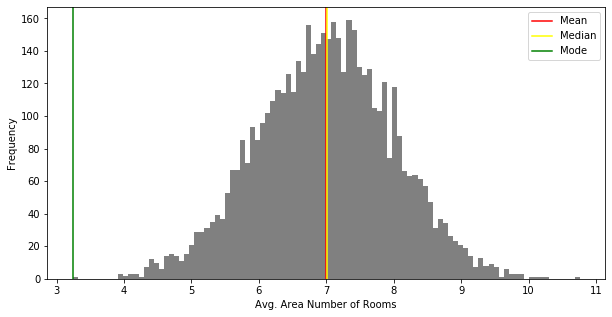

Mean:  3.9813299999999967 
Median:  4.05 
Mode:  4.38


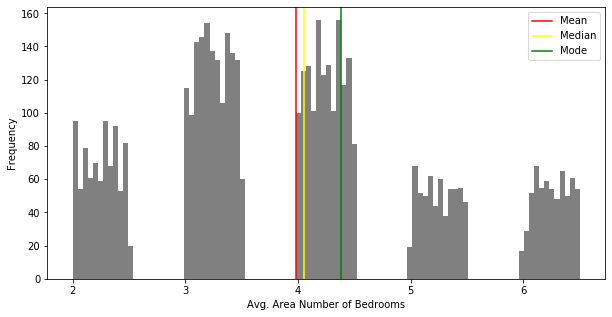

Mean:  36163.51603857463 
Median:  36199.406689260555 
Mode:  172.61068627290044


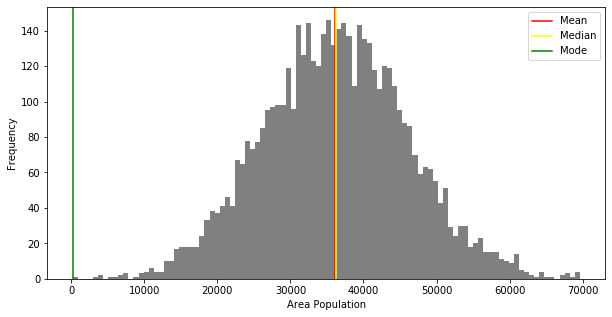

Mean:  1232072.65414236 
Median:  1232669.3779657914 
Mode:  15938.657923287848


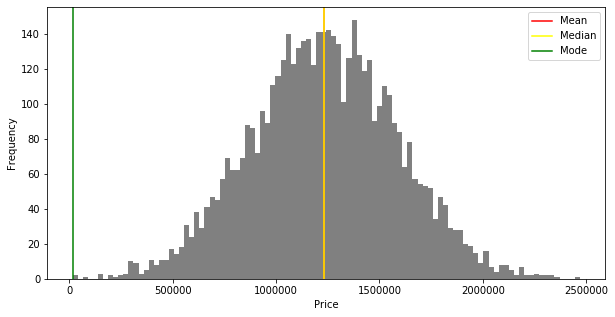

In [14]:
#Central Tendencies
for col in df:
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode()

    print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
    plt.figure(figsize=(10,5))
    plt.hist(df[col],bins=100,color='grey')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='yellow',label='Median')
    plt.axvline(mode[0],color='green',label='Mode')
    plt.xlabel(df.columns[df.columns.get_loc(col)])
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Minimum value:  17796.631189543397
Maximum value:  107701.74837763935
Range:  89905.11718809596
Variance:  113592776.7140852
Standard Deviation:  10657.991213830363
Q2 : 68804.28640371616
Q3 : 75783.33866615265
Q1 : 61480.562388460974
Interquartile Range : 14302.776277691672


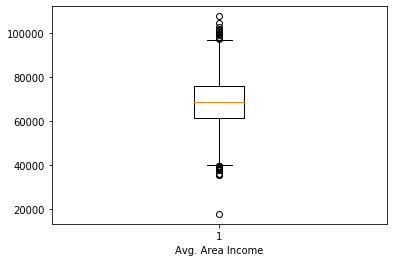

Minimum value:  2.644304186036705
Maximum value:  9.51908806613594
Range:  6.874783880099234
Variance:  0.9829853565194713
Standard Deviation:  0.9914561798281714
Q2 : 5.970428947124802
Q3 : 6.6508084794160585
Q1 : 5.322283015802158
Interquartile Range : 1.3285254636139001


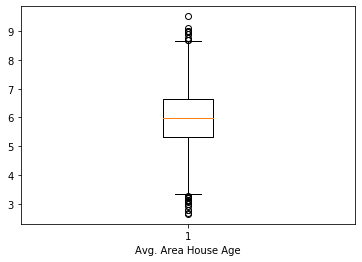

Minimum value:  3.2361940234262048
Maximum value:  10.759588335938624
Range:  7.523394312512419
Variance:  1.01170048914191
Standard Deviation:  1.0058332312773872
Q2 : 7.002901987201934
Q3 : 7.665871447597981
Q1 : 6.299250099611249
Interquartile Range : 1.3666213479867322


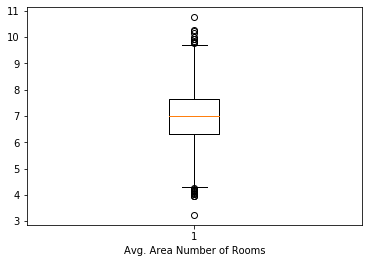

Minimum value:  2.0
Maximum value:  6.5
Range:  4.5
Variance:  1.5230947900580103
Standard Deviation:  1.2341372654846827
Q2 : 4.05
Q3 : 4.49
Q1 : 3.14
Interquartile Range : 1.35


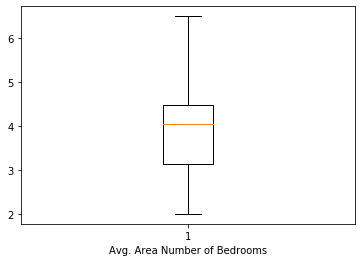

Minimum value:  172.61068627290044
Maximum value:  69621.7133777904
Range:  69449.10269151749
Variance:  98518530.17564726
Standard Deviation:  9925.650113501244
Q2 : 36199.406689260555
Q3 : 42861.290768915605
Q1 : 29403.928701608518
Interquartile Range : 13457.362067307087


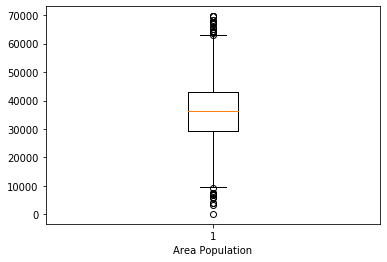

Minimum value:  15938.657923287848
Maximum value:  2469065.5941747027
Range:  2453126.936251415
Variance:  124692058202.24152
Standard Deviation:  353117.6265810608
Q2 : 1232669.3779657914
Q3 : 1471210.2042115545
Q1 : 997577.1350487601
Interquartile Range : 473633.0691627944


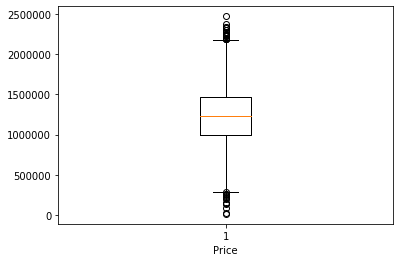

In [15]:
#Interquartile measures, Value Range and Top/Bottom(Max./Min.) values for fields
for col in df:
    #minimum value of Price
    print("Minimum value: ",df[col].min())

    #maximum value of Price
    print("Maximum value: ",df[col].max())

    #Range
    print("Range: ",df[col].max()-df[col].min())

    #variance
    print("Variance: ",df[col].var())

    #standard deviation
    print("Standard Deviation: ",sqrt(df[col].var()))

    #50th percentile i.e median(q2)
    print("Q2 :",df[col].quantile(0.5))

    #75th percentile
    q3 = df[col].quantile(0.75)
    print("Q3 :",q3)

    #25th percentile
    q1 = df[col].quantile(0.25)
    print("Q1 :",q1)

    #interquartile range
    IQR = q3  - q1
    print("Interquartile Range :",IQR)

    plt.boxplot(df[col])
    plt.xlabel(df.columns[df.columns.get_loc(col)])
    plt.show() 

In [16]:
#Detecting outliers with IQR for all Columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR_All = Q3 - Q1
print(IQR_All)

Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64


In [17]:
#The below code will give an output with true and false values. 
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier.
dff = (df < (Q1 - 1.5 * IQR_All)) | (df > (Q3 + 1.5 * IQR_All))
dff.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [18]:
dff.shape

(5000, 6)

In [19]:
#This code will remove the outliers from the dataset.
dff_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
dff_out.index = list(range(len(dff_out.index)))
dff_out.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [20]:
dff_out.shape

(4965, 6)

# Exploratory Visualizations:

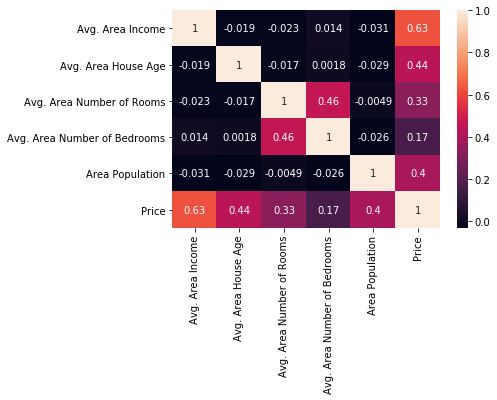

In [21]:
#Correlation Heatmaps
sns.heatmap(dff_out.corr(),annot = True)

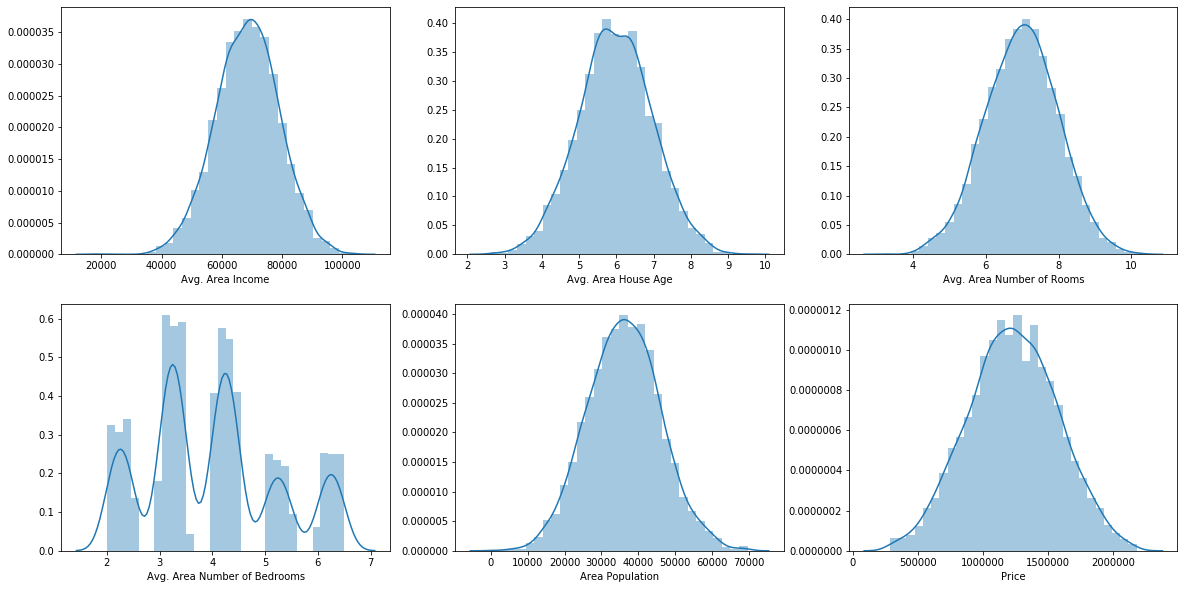

In [22]:
#Data Distribution plots
nrows = 2
fig, axes = plt.subplots(nrows, ncols=int(len(dff_out.columns)/nrows))
fig.set_figheight(10)
fig.set_figwidth(20)
for i, column in enumerate(dff_out.columns):
    sns.distplot(dff_out[column],ax=axes[i//3,i%3],bins=30)

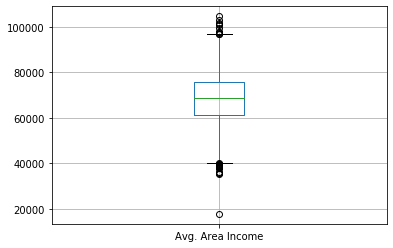

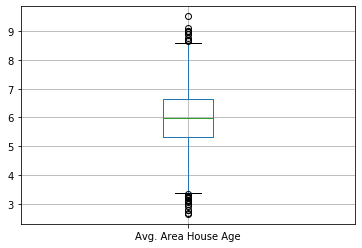

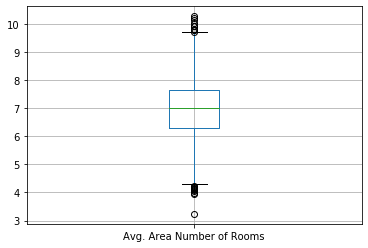

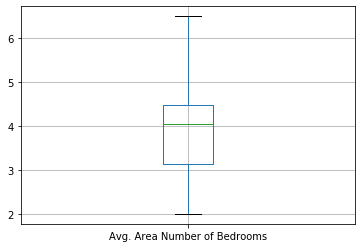

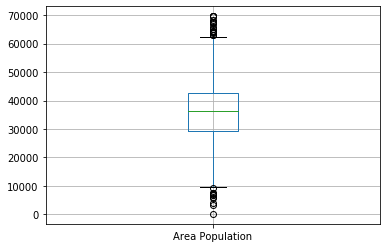

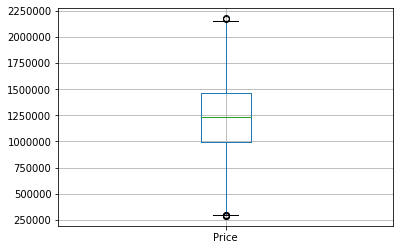

In [23]:
#Box Plots
for col in dff_out:
    plt.figure()
    dff_out.boxplot([col])

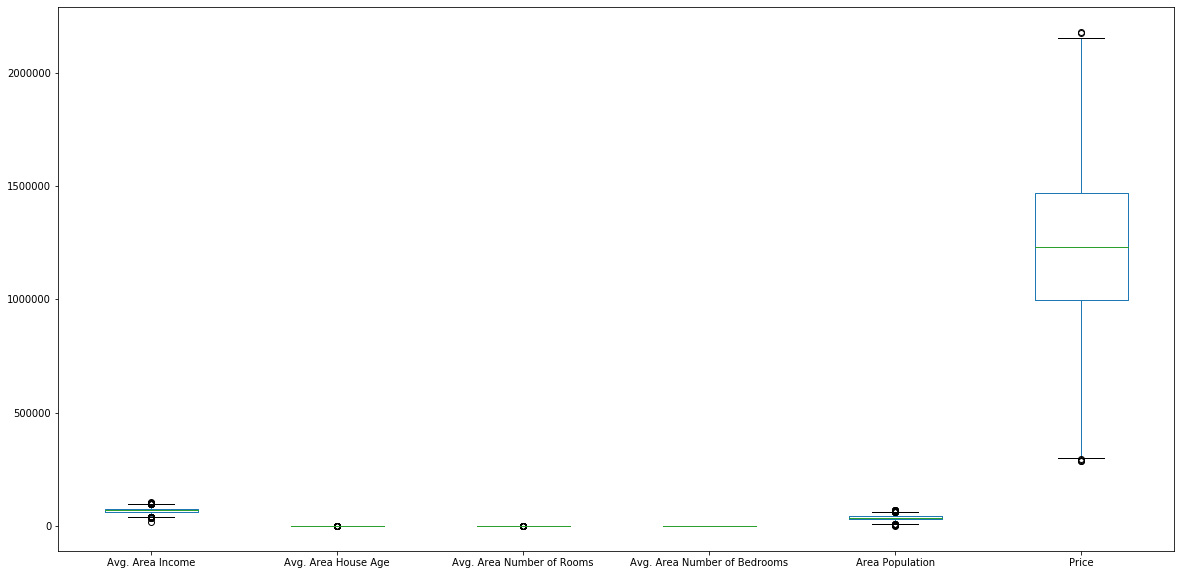

In [24]:
#Boxplot representing all features on a single scale
dff_out.plot(kind='box',figsize=(20,10))

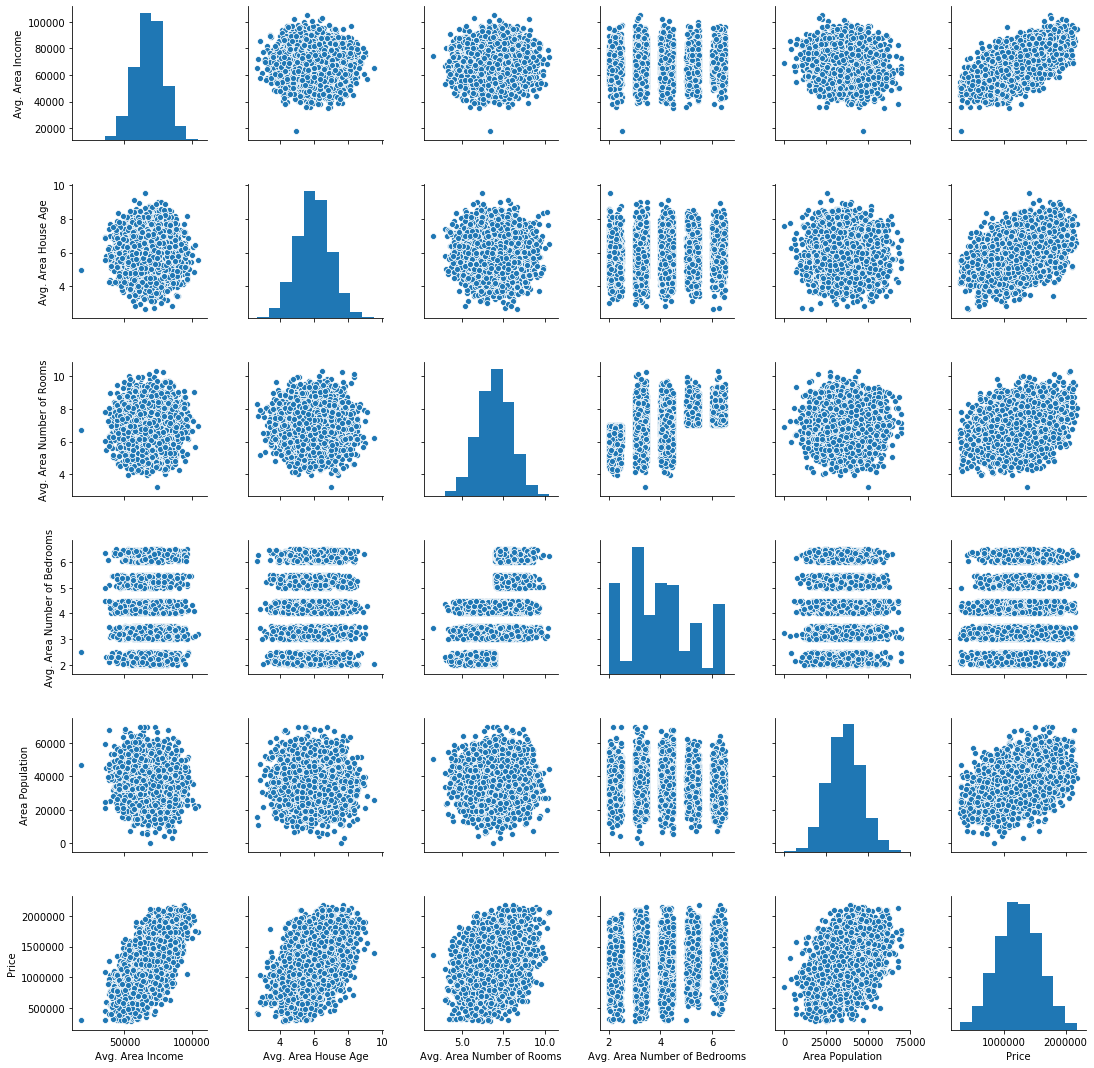

In [25]:
sns.pairplot(dff_out)

In [26]:
#Modality
def getExtremePoints(data, typeOfInflexion = None, maxPoints = None):
    """
    This method returns the indices where there is a change in the trend of the input series.
    """
    a = np.diff(data)
    asign = np.sign(a)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    idx = np.where(signchange ==1)[0]
    if typeOfInflexion == 'max' and data[idx[0]] < data[idx[1]]:
        idx = idx[1:][::2]
    elif typeOfInflexion == 'min' and data[idx[0]] > data[idx[1]]:
        idx = idx[1:][::2]
    elif typeOfInflexion is not None:
        idx = idx[::2]
    
    # sort ids by min value
    if 0 in idx:
        idx = np.delete(idx, 0)
    if (len(data)-1) in idx:
        idx = np.delete(idx, len(data)-1)
    idx = idx[np.argsort(data[idx])]
    # If we have maxpoints we want to make sure the timeseries has a cutpoint
    # in each segment, not all on a small interval
    if maxPoints is not None:
        idx= idx[:maxPoints]
        if len(idx) < maxPoints:
            return (np.arange(maxPoints) + 1) * (len(data)//(maxPoints + 1))
    return idx


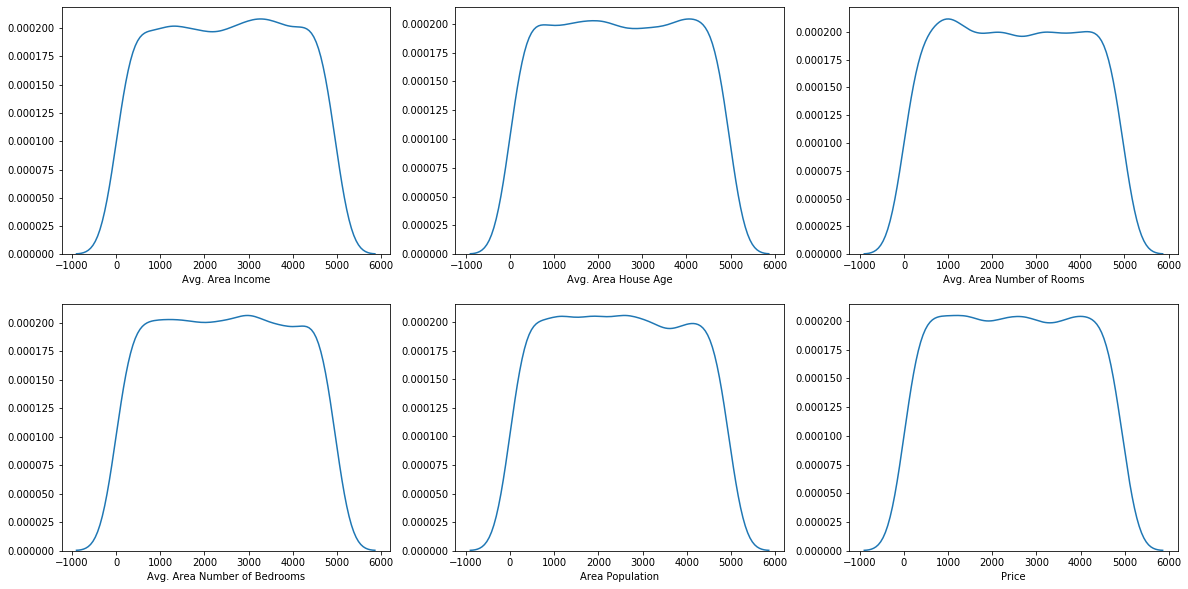

In [27]:
nrows = 2
fig, axes = plt.subplots(nrows, ncols=int(len(dff_out.columns)/nrows))
fig.set_figheight(10)
fig.set_figwidth(20)
for i, column in enumerate(dff_out.columns):
    r = list(getExtremePoints(dff_out[column]))
    sns.distplot(r,ax=axes[i//3,i%3],bins=30,axlabel = df.columns[df.columns.get_loc(column)],hist = False)

C:\Users\Naresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Naresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Naresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Naresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Naresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Naresh\Anaconda3\lib\site-packages\statsmodel

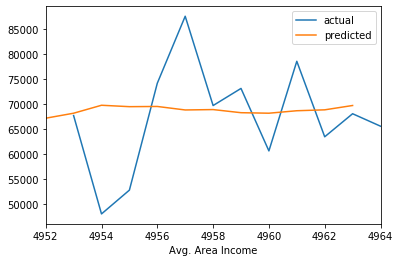

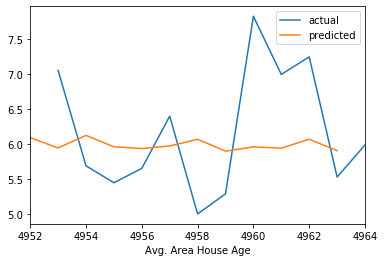

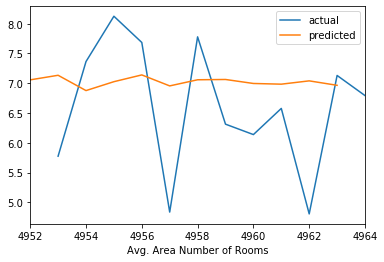

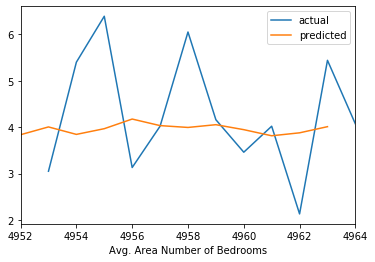

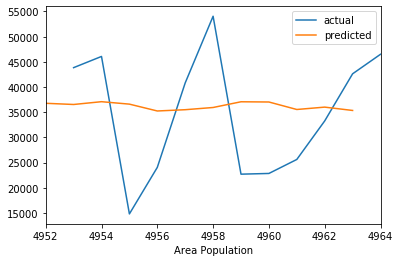

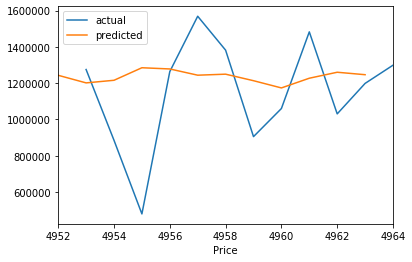

In [28]:
#Autoregression Lines - Applicable for Time Series data
from statsmodels.tsa.ar_model import AR
 
#create train/test datasets
for col in dff_out:
    X = dff_out[col].dropna()
    train_data = X[1:len(X)-12]
    test_data = X[len(X)-12:]
     #train the autoregression model
    model = AR(train_data)
    try:
        model_fitted = model.fit()
    except:
        model_fitted = model.fit(trend ='nc')
    # make predictions 
    predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
 
    # create a comparison dataframe
    compare_df = pd.concat(
    [dff_out[col].tail(12),predictions], axis=1).rename(
    columns={col: 'actual', 0:'predicted'})
 
    #plot the two values
    
    compare_df.plot()
    plt.xlabel(df.columns[df.columns.get_loc(col)])

In [29]:
#Interactive Plots
dff_out.iplot(kind='surface',colorscale='rdylbu')

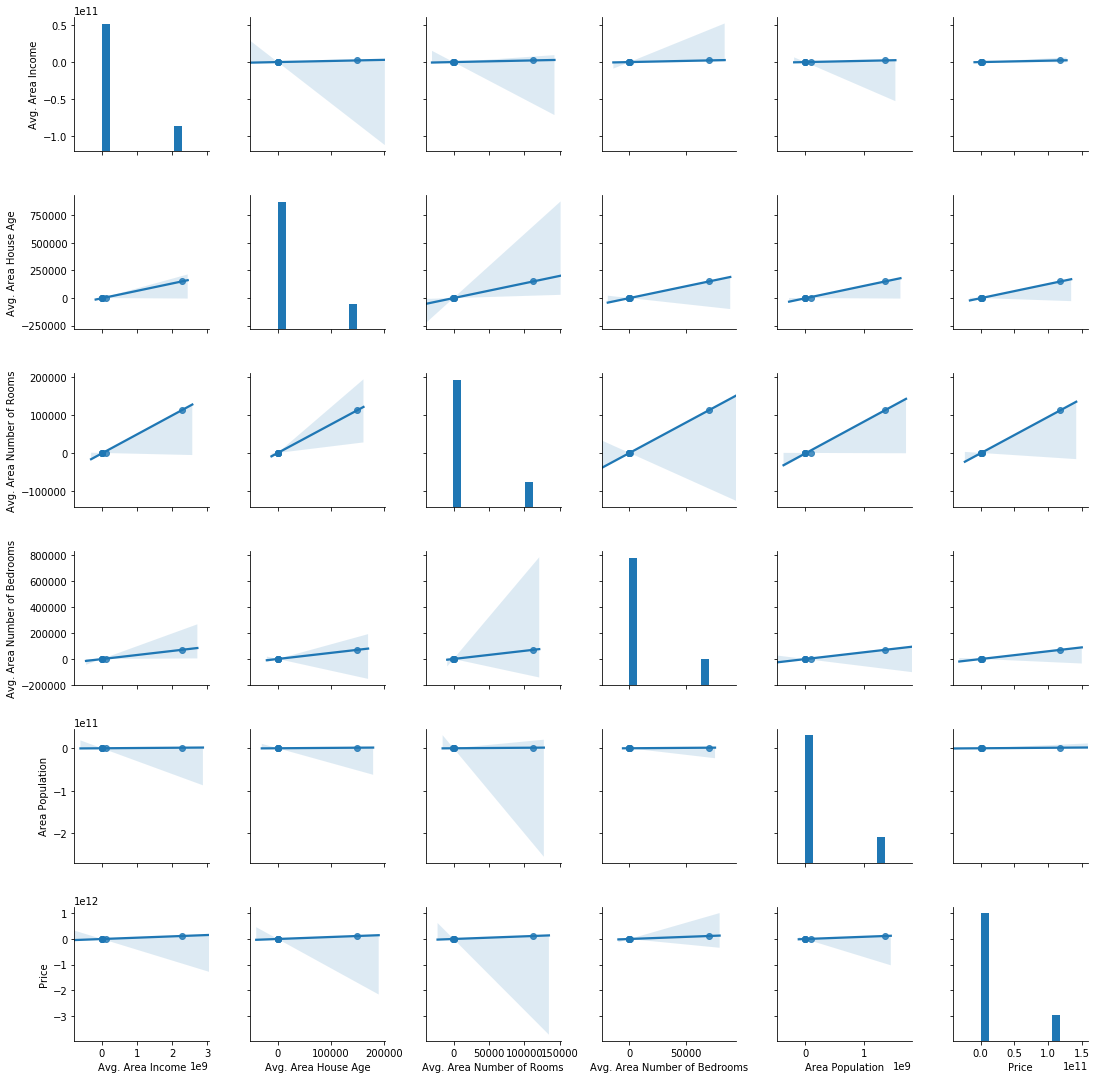

In [30]:
#Collinearity and Covariance among variables
sns.pairplot(dff_out.cov(),kind = 'reg')

[110877759.2747991, 0.9754728377235283, 1.002074623298837, 1.5243378296504215, 97885096.01765184, 117918464373.64359]


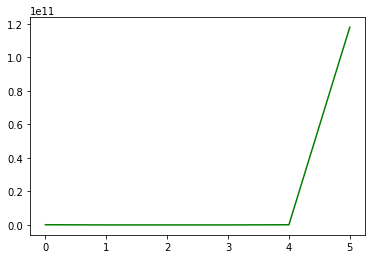

In [31]:
#Variance
l = []
for col in dff_out:
    v = statistics.variance(dff_out[col])
    l.append(v)
print(l)
plt.plot(l,'g-')
plt.show()

[110855427.39981927, 0.9752763678669878, 1.0018727955801463, 1.5240308129677125, 97865380.9932777, 117894714431.17155]


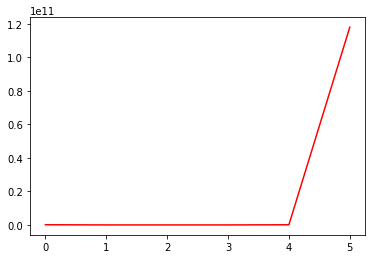

In [32]:
#Pvariance
p = []
for col in dff_out:
    v = statistics.pvariance(dff_out[col])
    p.append(v)
print(p)
plt.plot(p,'r-') 
plt.show()

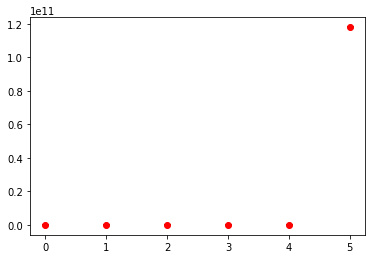

In [33]:
#Intra and inter field Variance - plotting in single plot
plt.plot(l,'g*', p, 'ro')  
plt.show()